# Exploratory Data Analysis

### Analysis
1. how often did I listened to music
2. My top artists
3. My most listened songs
4. Types of songs I listened to
5. Mood
6. 
5. Analysing the features of my songs
  - Based on features
  - Mode and key
  - correlation between features

---

### ML
- Probability of me listening to new song
- clustering


In [ ]:
!pip install calplot

In [ ]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import calplot
sns.set()

# 1. My Streaming History

In this section, I am going to analyse my behaviour and personality with the help of my music listening history. Here I am using my spotify listening history. I first started using spotify in 2019 and still continue to listen songs on it. Hence in the past 1 year I have generated a huge amount of data which will be enough for analysis. 

In [ ]:
# reading the dataset in dataframe
my_streaming = pd.read_csv('dataset.csv')
my_streaming = my_streaming.drop(columns=['Unnamed: 0'])
my_streaming.head(3)

,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature
0,Taylor Swift,Delicate,4956,2019-10-08 10:01:00,0.750,0.404,9,-10.178,0,0.0682,0.2160,0.000357,0.0911,0.0499,95.045,6NFyWDv5CjfwuzoCkw47Xf,4
1,Taylor Swift,Bad Blood,211933,2019-10-08 10:04:00,0.652,0.802,7,-6.114,1,0.1810,0.0871,0.000006,0.1480,0.2950,170.157,0TvQLMecTE8utzoNmvXRbK,4
2,Logic,1-800-273-8255,57518,2019-10-08 10:05:00,0.620,0.574,5,-7.788,0,0.0479,0.5690,0.000000,0.1900,0.3570,100.023,5tz69p7tJuGPeMGwNTxYuV,4


## How often did I listened music?

In this visualization, I will determine that everday for how long I used to listen to music. This plot is similar to a plot on github which shows us the number of commits we make everyday, but, here I will be showing the amount time (in minutes) I listened to music.

In [ ]:
# converting ms to minute and extracting date from datetime column
my_streaming['mins_played'] = my_streaming.apply(lambda x: round(x['msPlayed']/60000,2), axis=1)
my_streaming['date'] = my_streaming.apply(lambda x: pd.to_datetime(x['datetime'][:10],format='%Y-%m-%d'),axis=1)

# calculate the daily streaming time length 
daily_length = my_streaming.groupby('date',as_index=True).sum()

In [ ]:
# create new date series for displaying time series data
idx = pd.DataFrame(pd.date_range(min(my_streaming.date), max(my_streaming.date)),columns=['date'])
idx['date'] = idx.apply(lambda x: pd.to_datetime(x['date'],format='%Y-%m-%d'),axis=1)

# use new date series to display the daily streaming time
new_daily_length = pd.merge(idx, daily_length, how='left', left_on='date', right_on = 'date', copy=False)
new_daily_length.head(3)

,date,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,mins_played
0,2019-10-08,274407.0,2.022,1.780,21.0,-24.080,1.0,0.2971,0.872100,0.000363,0.4291,0.7019,365.225,12.0,4.57
1,2019-10-09,465719.0,3.911,4.379,43.0,-46.284,4.0,0.6542,2.222413,0.000028,1.1122,3.2350,793.424,28.0,7.76
2,2019-10-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-10-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-10-12,1169998.0,4.696,4.186,49.0,-45.669,5.0,0.5804,1.161800,0.000315,1.1577,3.1440,807.729,26.0,19.52


In [ ]:
# getting rid of columns except for date and time
new_daily_length = new_daily_length.drop(new_daily_length.loc[:, 'msPlayed':'time_signature'], axis=1)

# setting date as index
new_daily_length.index = new_daily_length.date

new_daily_length = new_daily_length.drop(columns=['date'])
new_daily_length.head(3)

,mins_played
date,
2019-10-08,4.57
2019-10-09,7.76
2019-10-10,NaN


In [ ]:
# converting the dataframe into series for calplot
new_daily_length = new_daily_length.squeeze()

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


(<Figure size 1440x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f83aa6b5048>,
       dtype=object))

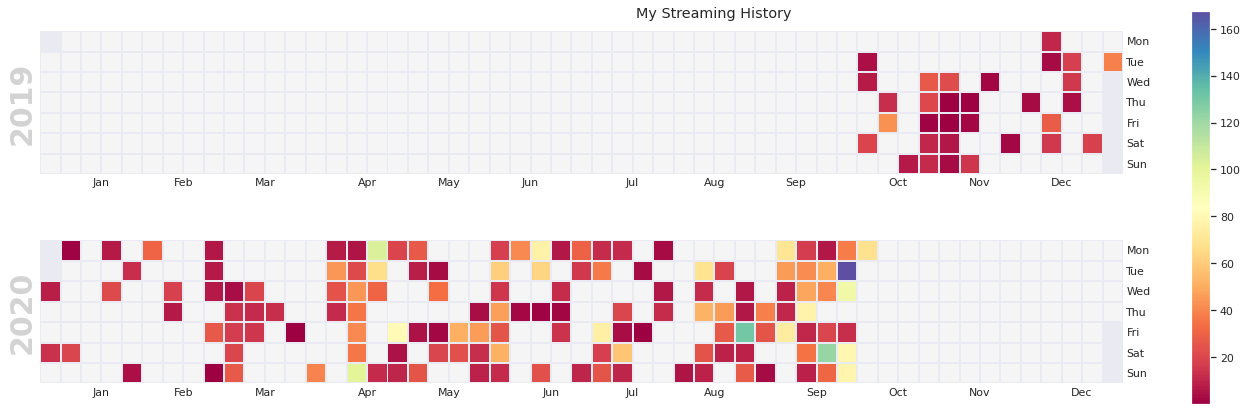

In [ ]:
calplot.calplot(new_daily_length, figsize=(20,6), suptitle='My Streaming History', cmap='Spectral' )

I listen to music everyday when I used to travel to my college. As per the graph, everyday I used to listen to songs from 5-80 mins. However, there were days when I listened to music for more than 100 mins as well. Morover, many days I never listened to music as well, this is probably because I might be late for my college and I never had the time to plug in. Then since April 2020 lockdown was imposed, and at home I listened for less amount of time (approx less than 30 minutes). However, there were a few days when I would listen for more than an hour.

## Whom did I listened to most?

Here I will be plotting a graph to determine my most heard artist in this past year. 

In [ ]:
# grouping the dataset as per artist name and counting the songs per artist
artist_length = my_streaming.groupby('artistName',as_index=False).sum()
artist_song_cnt = my_streaming.groupby('artistName',as_index=False).agg({"trackName": "nunique"})

In [ ]:
# merge artist_length and artist_song_cnt 
artist_length_uniqsong = pd.merge(artist_length,artist_song_cnt,how='left',on='artistName',copy=False)
artist_length_uniqsong.rename(columns={'trackName':'unique_track_number'},inplace=True)
artist_length_uniqsong.head(3)

,artistName,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,mins_played,unique_track_number
0,2015 D&R,221779,0.685,0.684,5,-7.599,0,0.0339,0.000814,0.000014,0.2210,0.640,122.998,4,3.70,1
1,3LAU,608561,2.888,3.912,17,-22.770,5,0.3388,0.285100,0.000089,1.0238,2.065,552.847,20,10.15,5
2,5 Seconds of Summer,868138,3.046,3.414,28,-23.304,4,0.8633,0.608400,0.000000,0.5738,2.815,650.146,20,14.46,5


In [ ]:
max_time  = artist_length_uniqsong.sort_values(by=['mins_played'])
max_time.tail()

,artistName,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,mins_played,unique_track_number
21,Alex Aiono,3710532,20.016,17.265,161,-223.314,17,3.5588,10.703725,0.174039,4.2672,13.647,3693.331,122,61.82,31
259,Iggy Azalea,3781272,15.966,14.472,122,-122.360,13,3.3593,1.678340,0.433386,3.5574,10.836,2645.642,84,63.01,21
499,Rak-Su,4014937,17.647,17.730,125,-161.250,12,3.4095,5.205370,2.609881,5.5293,14.762,2927.403,104,66.92,26
283,Jason Derulo,4461933,18.541,18.834,152,-137.589,15,3.7231,2.971274,0.067931,3.6545,15.792,2802.529,103,74.38,26
276,Jake Miller,4889659,17.079,17.534,184,-187.771,16,2.8998,8.046600,0.001785,4.4326,14.304,3776.822,108,81.50,28


In [ ]:
# top 30 artist I listen to (tail because the df is in ascending order of count of minutes)
most_heard_30 = max_time.tail(30)

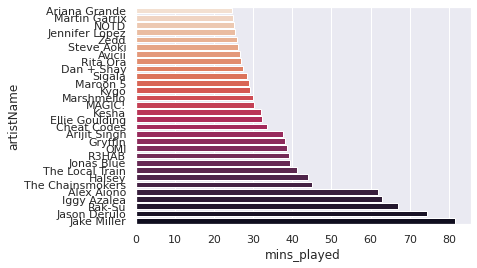

In [ ]:
# barplot artist vs minutes_played
plt.rcParams["figure.figsize"] = (20,20)
sns.barplot(y = most_heard_30['artistName'], x = most_heard_30['mins_played'], palette='rocket_r')
plt.title('Top 30 Artist heard')
plt.show()

Since the bar graph could only show 30 artist clearly. In the next plot, I have made a word cloud, where I am representing my top 100 artists  with no compromise in clarity.

In [ ]:
# converted df to dict
artist_freq = dict(zip(artist_length_uniqsong['artistName'].tolist(), artist_length_uniqsong['mins_played'].tolist()))

NameError: ignored

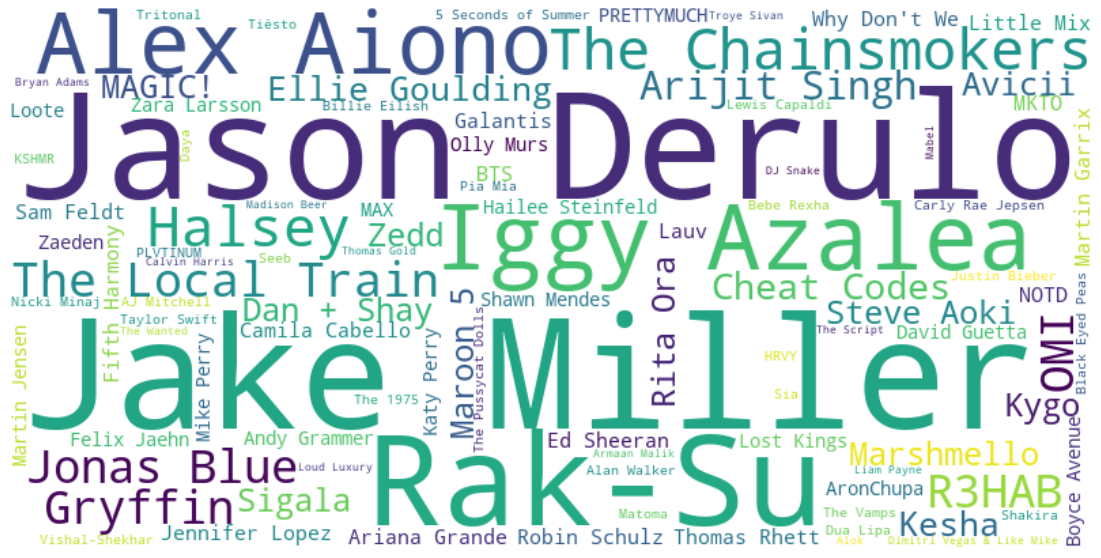

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white',width=800, height=400, max_words=100).generate_from_frequencies(artist_freq)
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

As you can see in the  above graph, the bigger the artist the name, the most I listened to the artist. Moreover, this plot easily inculacate 100 artists.

In [ ]:
max_songs = artist_length_uniqsong.loc[artist_length_uniqsong['unique_track_number'] > 5]

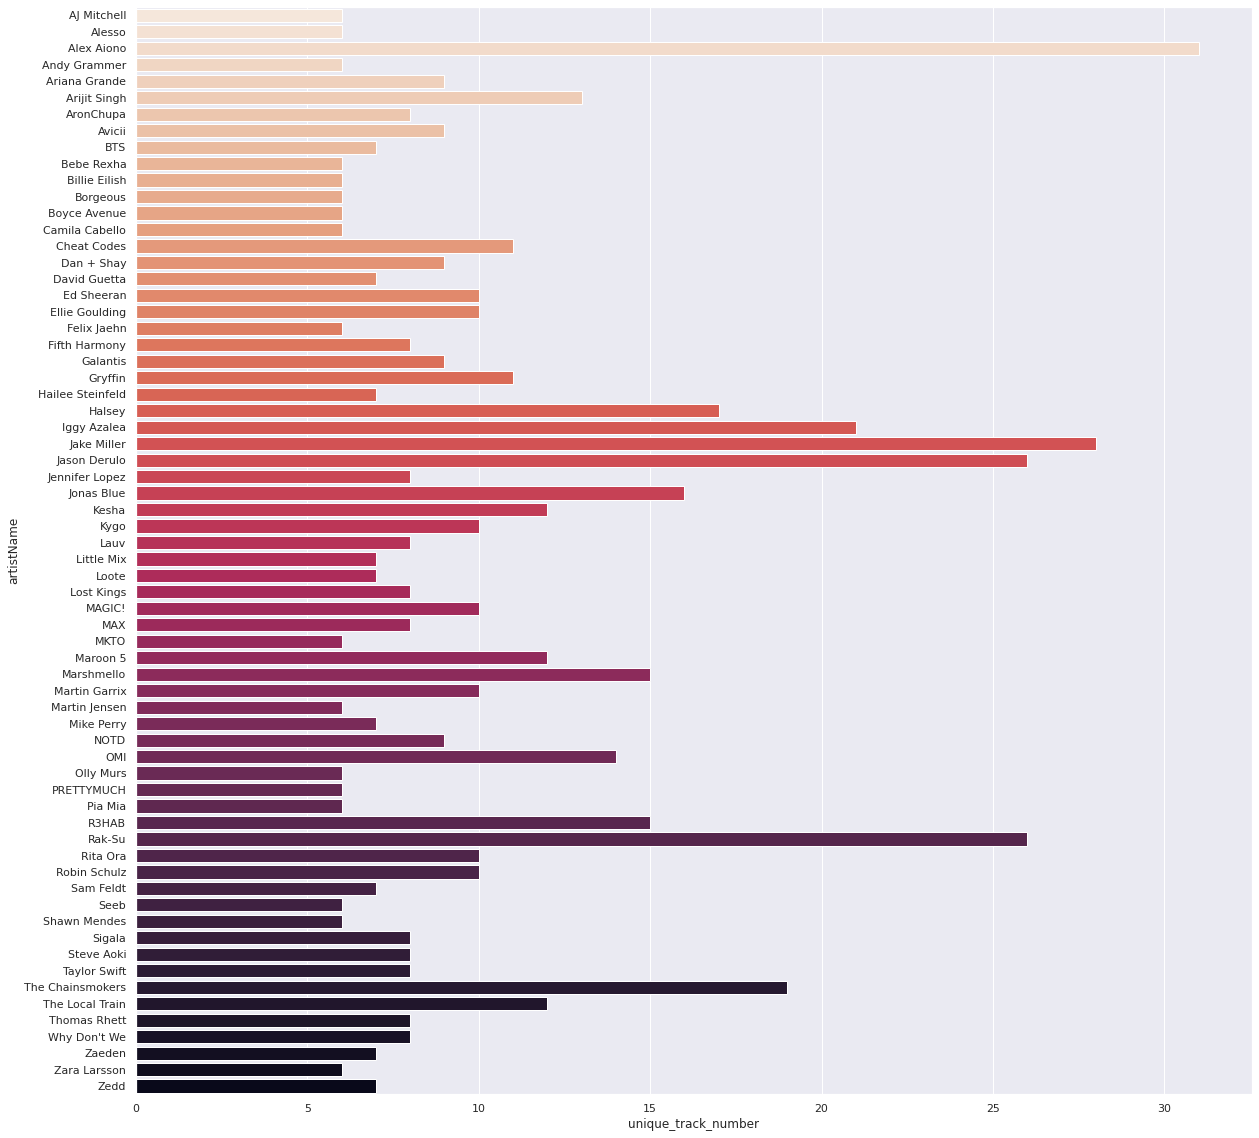

In [ ]:
sns.barplot(y = max_songs['artistName'], x = max_songs['unique_track_number'], palette='rocket_r')
plt.rcParams["figure.figsize"] = (20,20)

## My mood throughout the year.

In [ ]:
my_streaming.columns

Index(['artistName', 'trackName', 'msPlayed', 'datetime', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'id',
       'time_signature', 'mins_played', 'date'],
      dtype='object')

In [ ]:
# create new date series for displaying time series data
idx = pd.DataFrame(pd.date_range(min(my_streaming.date), max(my_streaming.date)),columns=['date'])
idx['date'] = idx.apply(lambda x: pd.to_datetime(x['date'],format='%Y-%m-%d'),axis=1)

In [ ]:
valence = my_streaming.groupby('date')['valence'].aggregate(['min', np.mean, 'max'])

In [ ]:
val = pd.merge(idx, valence, how='left', left_on='date', right_on = 'date', copy=False).fillna(0)
val.head()

,date,min,mean,max
0,2019-10-08,0.0499,0.233967,0.357
1,2019-10-09,0.2460,0.462143,0.624
2,2019-10-10,0.0000,0.000000,0.000
3,2019-10-11,0.0000,0.000000,0.000
4,2019-10-12,0.2690,0.449143,0.678


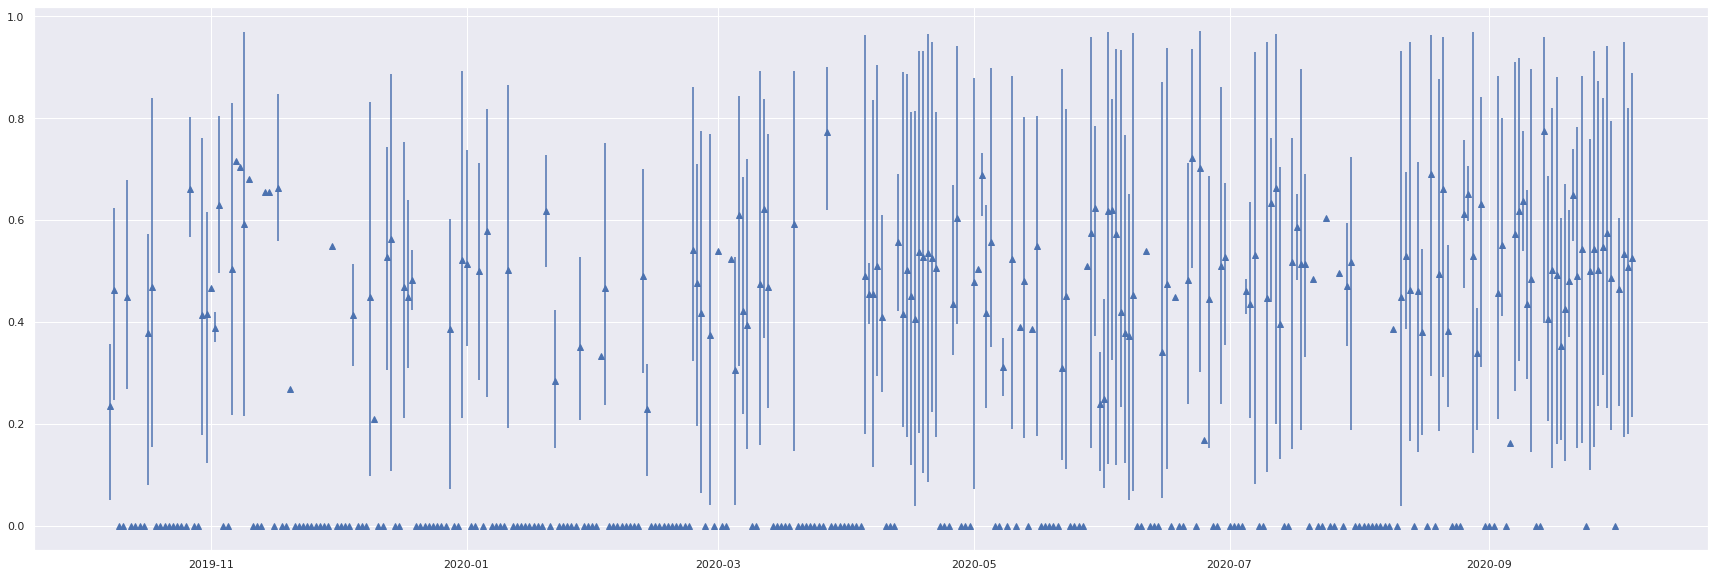

In [ ]:
plt.rcParams["figure.figsize"] = (30,10)
plt.errorbar(val["date"],val["mean"], [val["mean"] - val['min'],val['max']-val["mean"]], linestyle='None',marker='^')
plt.show()

In [ ]:
energy = my_streaming.groupby('date')['energy'].aggregate(['min', np.mean, 'max'])
dance = my_streaming.groupby('date')['danceability'].aggregate(['min', np.mean, 'max'])

In [ ]:
d = pd.merge(idx, energy, how='left', left_on='date', right_on = 'date', copy=False).fillna(0)
e = pd.merge(idx, dance, how='left', left_on='date', right_on = 'date', copy=False).fillna(0)

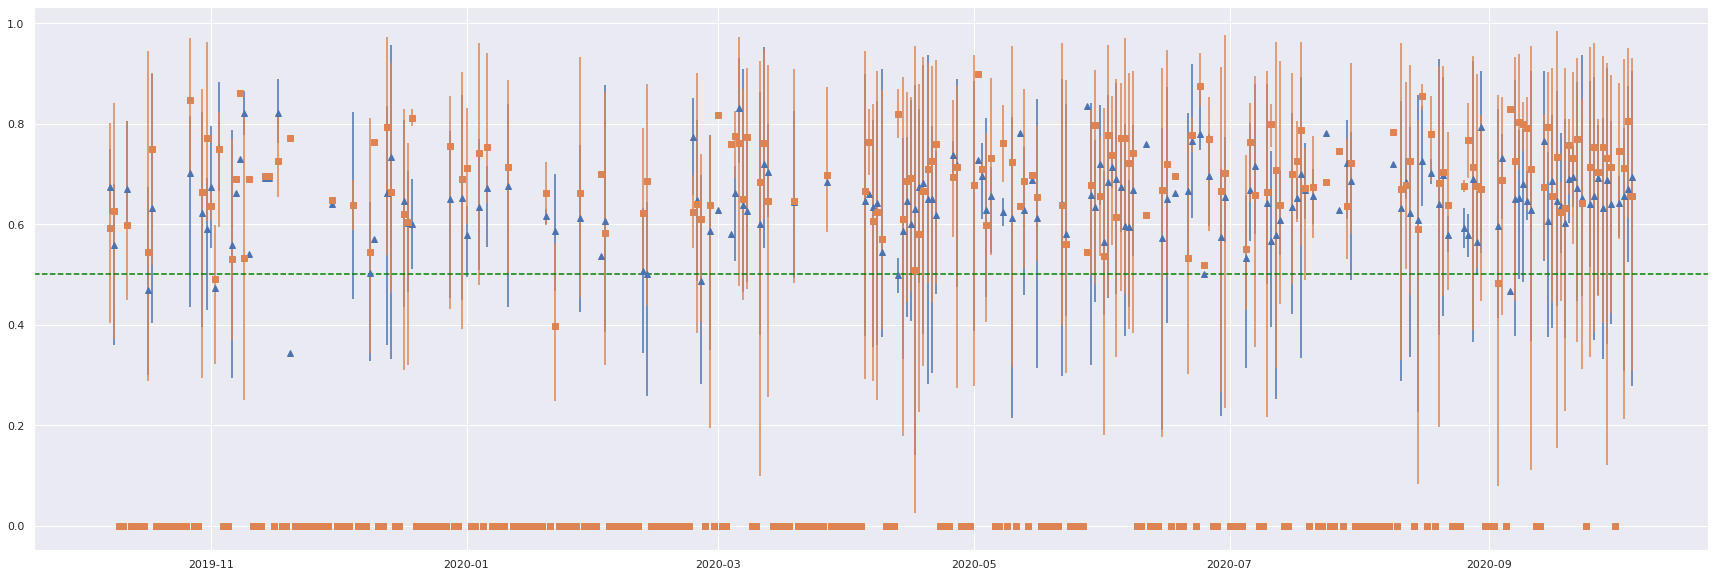

In [ ]:
plt.rcParams["figure.figsize"] = (30,10)
plt.errorbar(e["date"],e["mean"], [e["mean"] - e['min'],e['max']-e["mean"]], linestyle='None',marker='^')
plt.errorbar(d["date"],d["mean"], [d["mean"] - d['min'],d['max']-d["mean"]], linestyle='None',marker='s')
plt.axhline(y=0.5, color='green', linestyle='dashed')
plt.show()

# Feature Analysis

## Histogram

In [ ]:
features = ['danceability', 'energy', 'key', 'loudness' ,'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence','tempo']

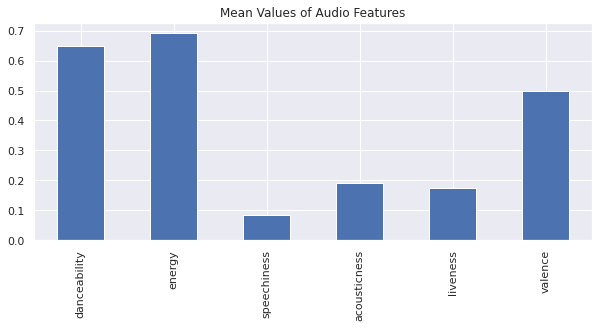

In [ ]:
small = my_streaming[['danceability', 'energy', 'speechiness', 'acousticness', 'liveness', 'valence']]
plt.figure(figsize=(10,4))
small.mean().plot.bar()
plt.title('Mean Values of Audio Features')
plt.show()

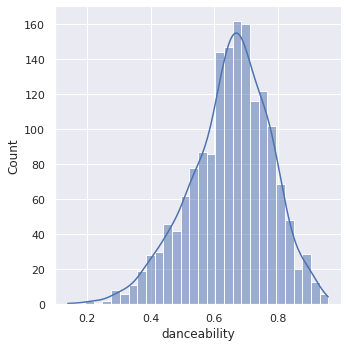

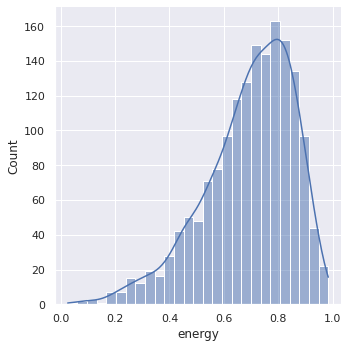

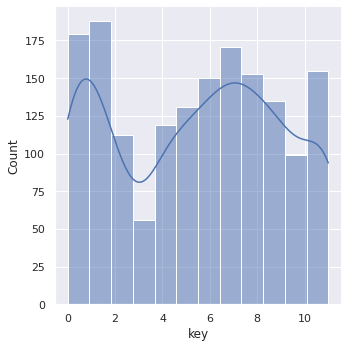

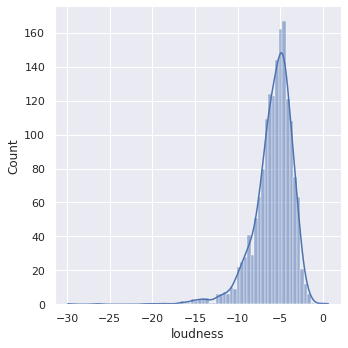

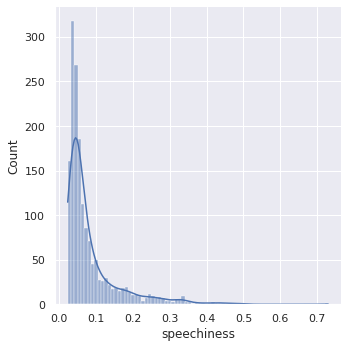

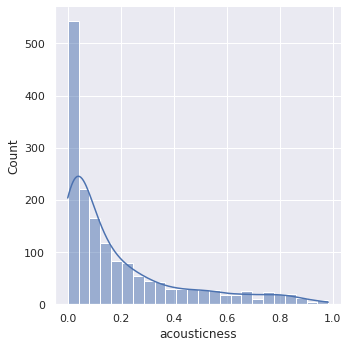

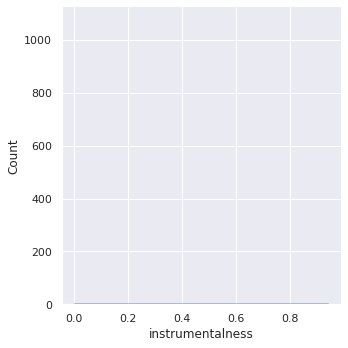

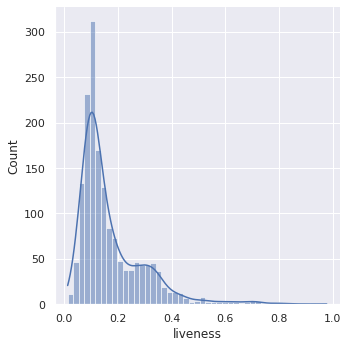

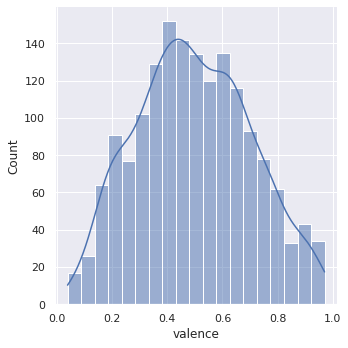

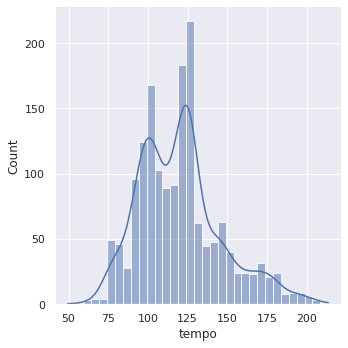

In [ ]:
for col in features:
  sns.displot(my_streaming, x=col, kde=True)
  plt.show()

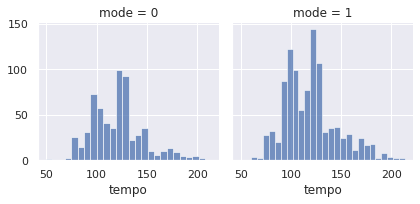

In [ ]:
plt.rcParams['figure.figsize'] = (20,7)
g = sns.FacetGrid(my_streaming, col='mode')
g.map(sns.histplot, "tempo")
plt.show()

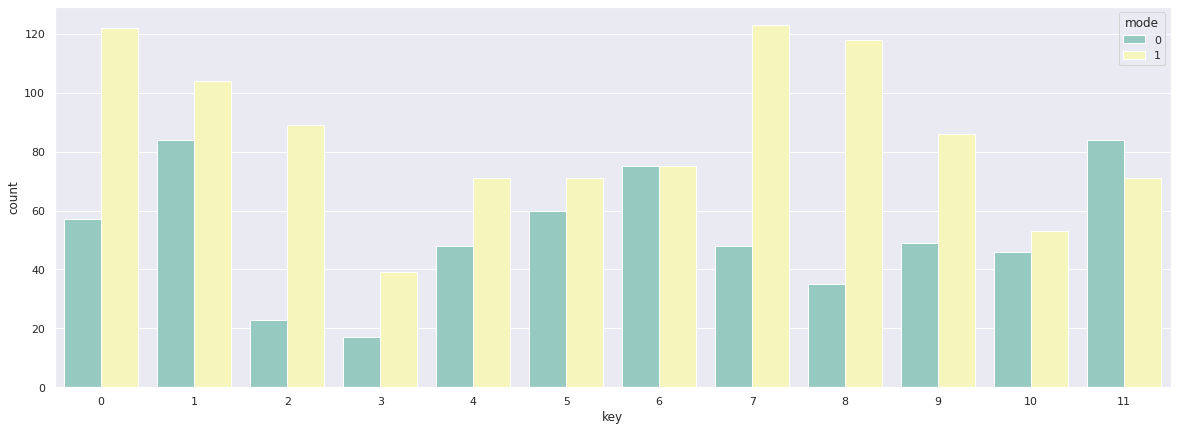

In [ ]:
sns.countplot(data=my_streaming, x='key', hue='mode', palette = 'Set3')

## Heatmap

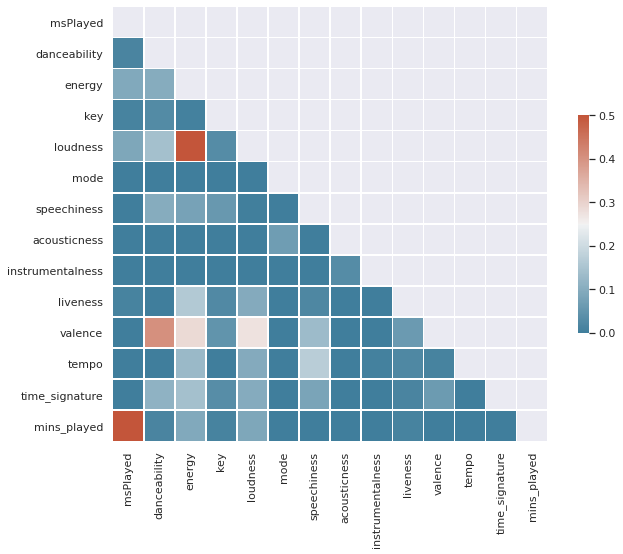

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(my_streaming.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(my_streaming.corr(), mask=mask, cmap=cmap, vmin=0, vmax=.5, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the heatmap we can see that there is a huge correlation between:
- loudness X energy
- valence X danceability
- valence X energy
- valence X loudness
- energy X time_signature

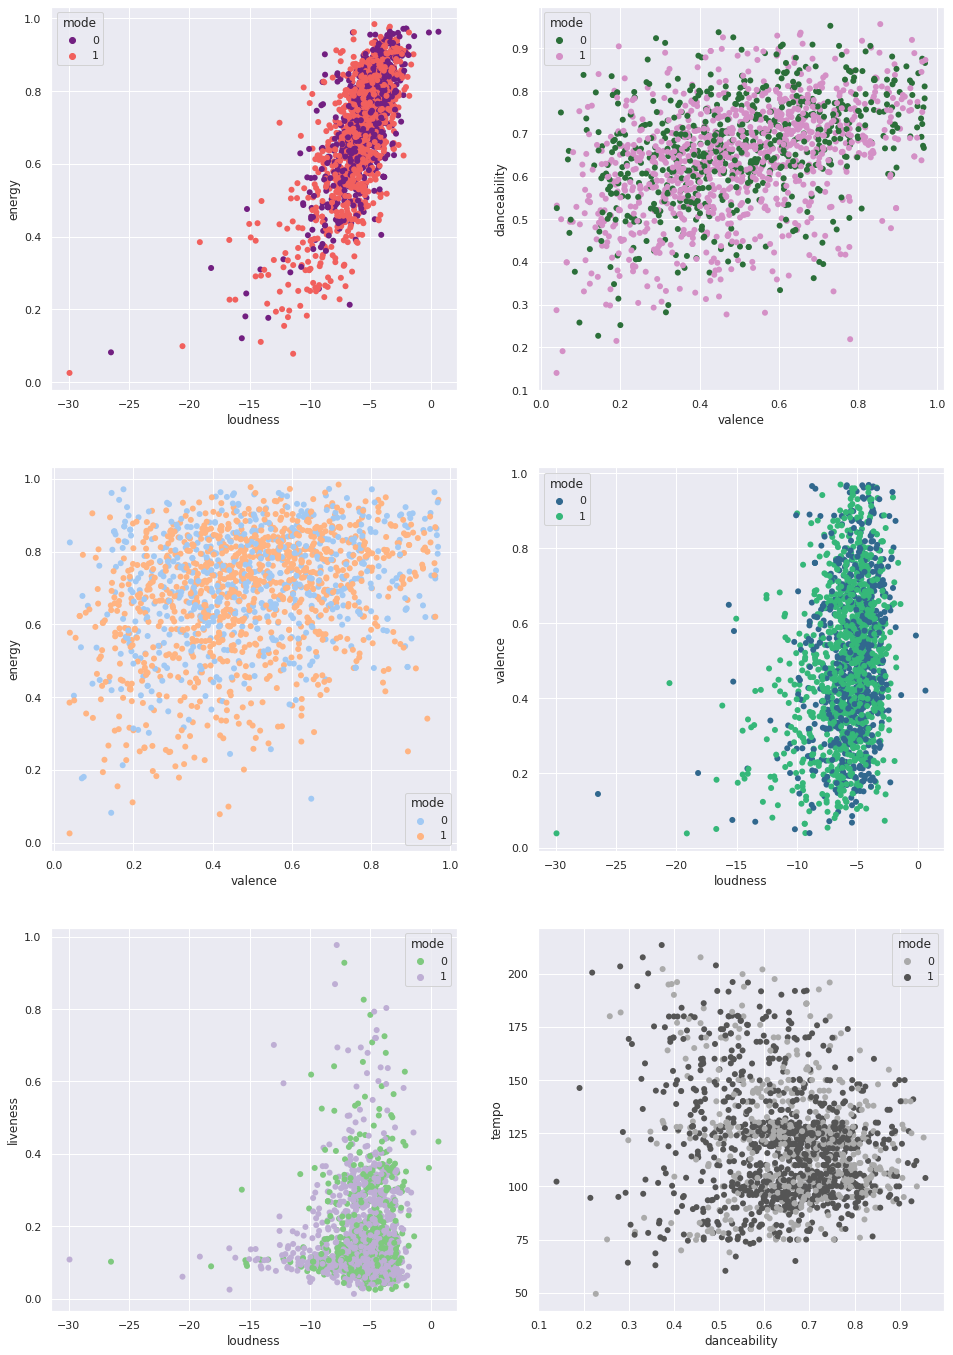

In [ ]:
f, ax = plt.subplots(3,2, figsize=(16,24))

sns.scatterplot(x="loudness", y="energy",
                hue="mode", 
                palette="magma",
                sizes=(1, 8), linewidth=0,
                data=my_streaming, ax=ax[0][0])

sns.scatterplot(x="valence", y="danceability",
                hue="mode", 
                palette="cubehelix",
                sizes=(1, 8), linewidth=0,
                data=my_streaming, ax=ax[0][1])

sns.scatterplot(x="valence", y="energy",
                hue="mode", 
                palette="pastel",
                sizes=(1, 8), linewidth=0,
                data=my_streaming, ax=ax[1][0])

sns.scatterplot(x="loudness", y="valence",
                hue="mode", 
                palette="viridis",
                sizes=(1, 8), linewidth=0,
                data=my_streaming, ax=ax[1][1])

sns.scatterplot(x="loudness", y="liveness",
                hue="mode", 
                palette="Accent",
                sizes=(1, 8), linewidth=0,
                data=my_streaming, ax=ax[2][0])

sns.scatterplot(x="danceability", y="tempo",
                hue="mode", 
                palette="binary",
                sizes=(1, 8), linewidth=0,
                data=my_streaming, ax=ax[2][1])

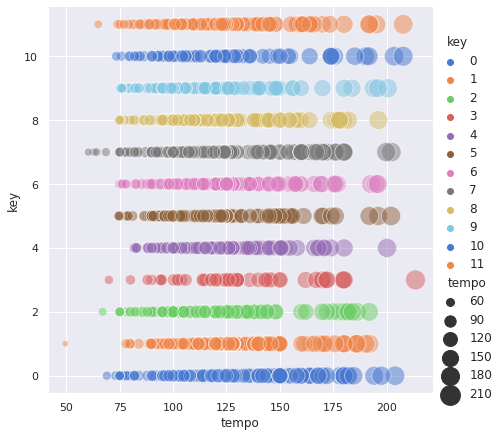

In [ ]:
sns.relplot(x="tempo", y="key", hue="key", size=my_streaming['tempo'],
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=my_streaming)

In [ ]:
table = pd.pivot_table(my_streaming,index=['artistName'], values = ['key'], aggfunc=np.mean)
table

,key
artistName,
2015 D&R,5.000000
3LAU,3.400000
5 Seconds of Summer,5.600000
8-Bit Arcade,2.000000
88rising,6.666667
...,...
iKON,7.000000
teamwork.,6.000000
tofû,0.000000


# My Playlists Analysis

In [ ]:
df = pd.read_csv('/content/playlist_data.csv')
df.head(3)

,Unnamed: 0,list_name,song_id,song_name,artist,popularity,release_date,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,duration_ms,loudness,valence,mode,key
0,0,Hip-hop/Rap,49NWFeDYeNBx55vxxmwCQe,45 Man - Bonus Track,Rak-Su,17,2017-04-03,0.883,0.0818,140.058,0.2760,0.0223,0.000,0.664,206530,-5.671,0.695,1,1
1,1,Country,2bCBowfjQbsT6jXEqpGqDx,"Geronimo - From ""Alvin And The Chipmunks: The ...",Sheppard,36,2015-12-11,0.763,0.1380,142.037,0.0818,0.3780,0.002,0.704,217653,-6.343,0.468,1,7
2,2,Jason derulo,6kex4EBAj0WHXDKZMEJaaF,Swalla (feat. Nicki Minaj & Ty Dolla $ign),Jason Derulo,77,2017-02-23,0.817,0.1870,98.064,0.1090,0.0750,0.000,0.696,216409,-3.862,0.782,1,1


## Comparing different playlists

In [ ]:
from math import pi

In [ ]:
radar = df.groupby('list_name')[['energy', 'danceability', 'valence', 'liveness', 'acousticness']].aggregate(np.mean)
radar.head(3)

,energy,danceability,valence,liveness,acousticness
list_name,,,,,
Beats/EDM,0.735316,0.658105,0.525526,0.198763,0.096175
Country,0.763000,0.704000,0.468000,0.138000,0.378000
Cringe,0.705727,0.675364,0.555091,0.122127,0.152400


In [ ]:
playlist_names = radar.index.to_list()
playlist_names

['Beats/EDM',
 'Country',
 'Cringe',
 'Cyrus ne suggest kia',
 'Halsey inducing palsey',
 'Hip-hop/Rap',
 'Jason derulo',
 'Random',
 'Yash ke gaane']

In [ ]:
def plot_radar(idx,color):
  # categories
  category = ['energy', 'danceability', 'valence', 'liveness', 'acousticness']
  N = len(category)

  #values
  values = radar.iloc[idx].to_list()
  values += values[:1]

  # calculate angle for each category
  angles = [n / float(N) * 2 * pi for n in range(N) ]
  angles += angles[:1]

  # plot
  plt.polar(angles, values, marker = '.', color=color)
  plt.fill(angles, values, alpha=0.3, color=color)

  # x labels
  plt.xticks(angles[:-1], category)

  # y labels
  plt.yticks([0.2,0.4,0.6,0.8])
  plt.ylim(0,1)

In [ ]:
color = ['crimson', 'teal', 'yellowgreen', 'gold', 'maroon', 'gray', 'lime', 'slateblue', 'chocolate', 'darkcyan']

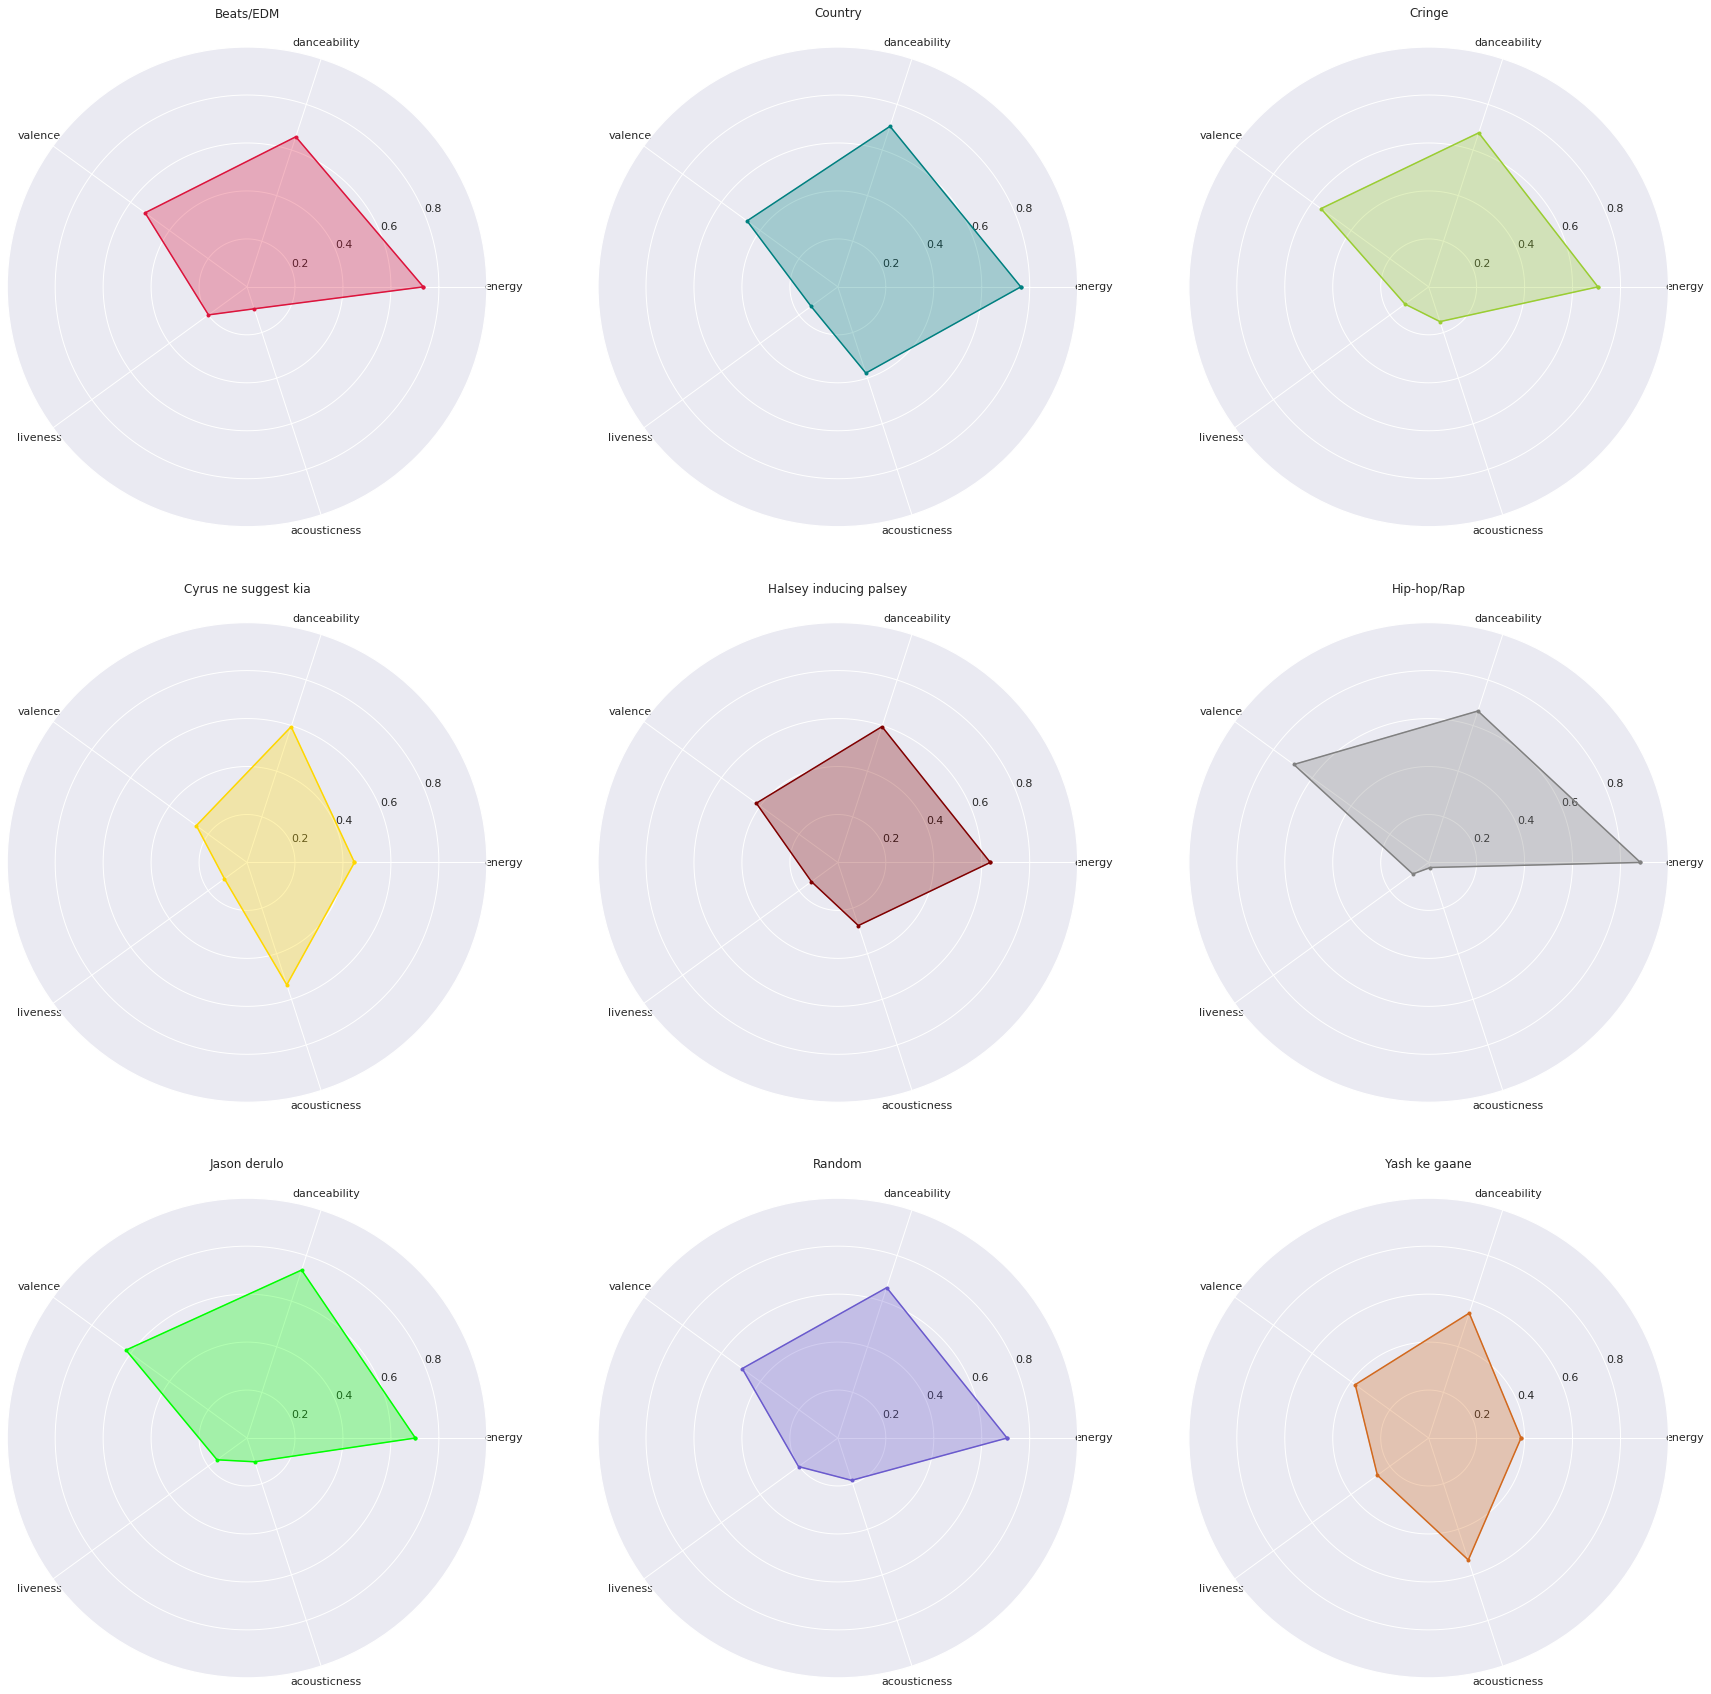

In [ ]:
plt.rcParams['figure.figsize'] = (30,30)
for i in range(9):
  k = i+1
  ax = plt.subplot(int('33' + str(k)), polar='True')
  ax.title.set_text(playlist_names[i])
  plot_radar(i,color[i])

plt.show()

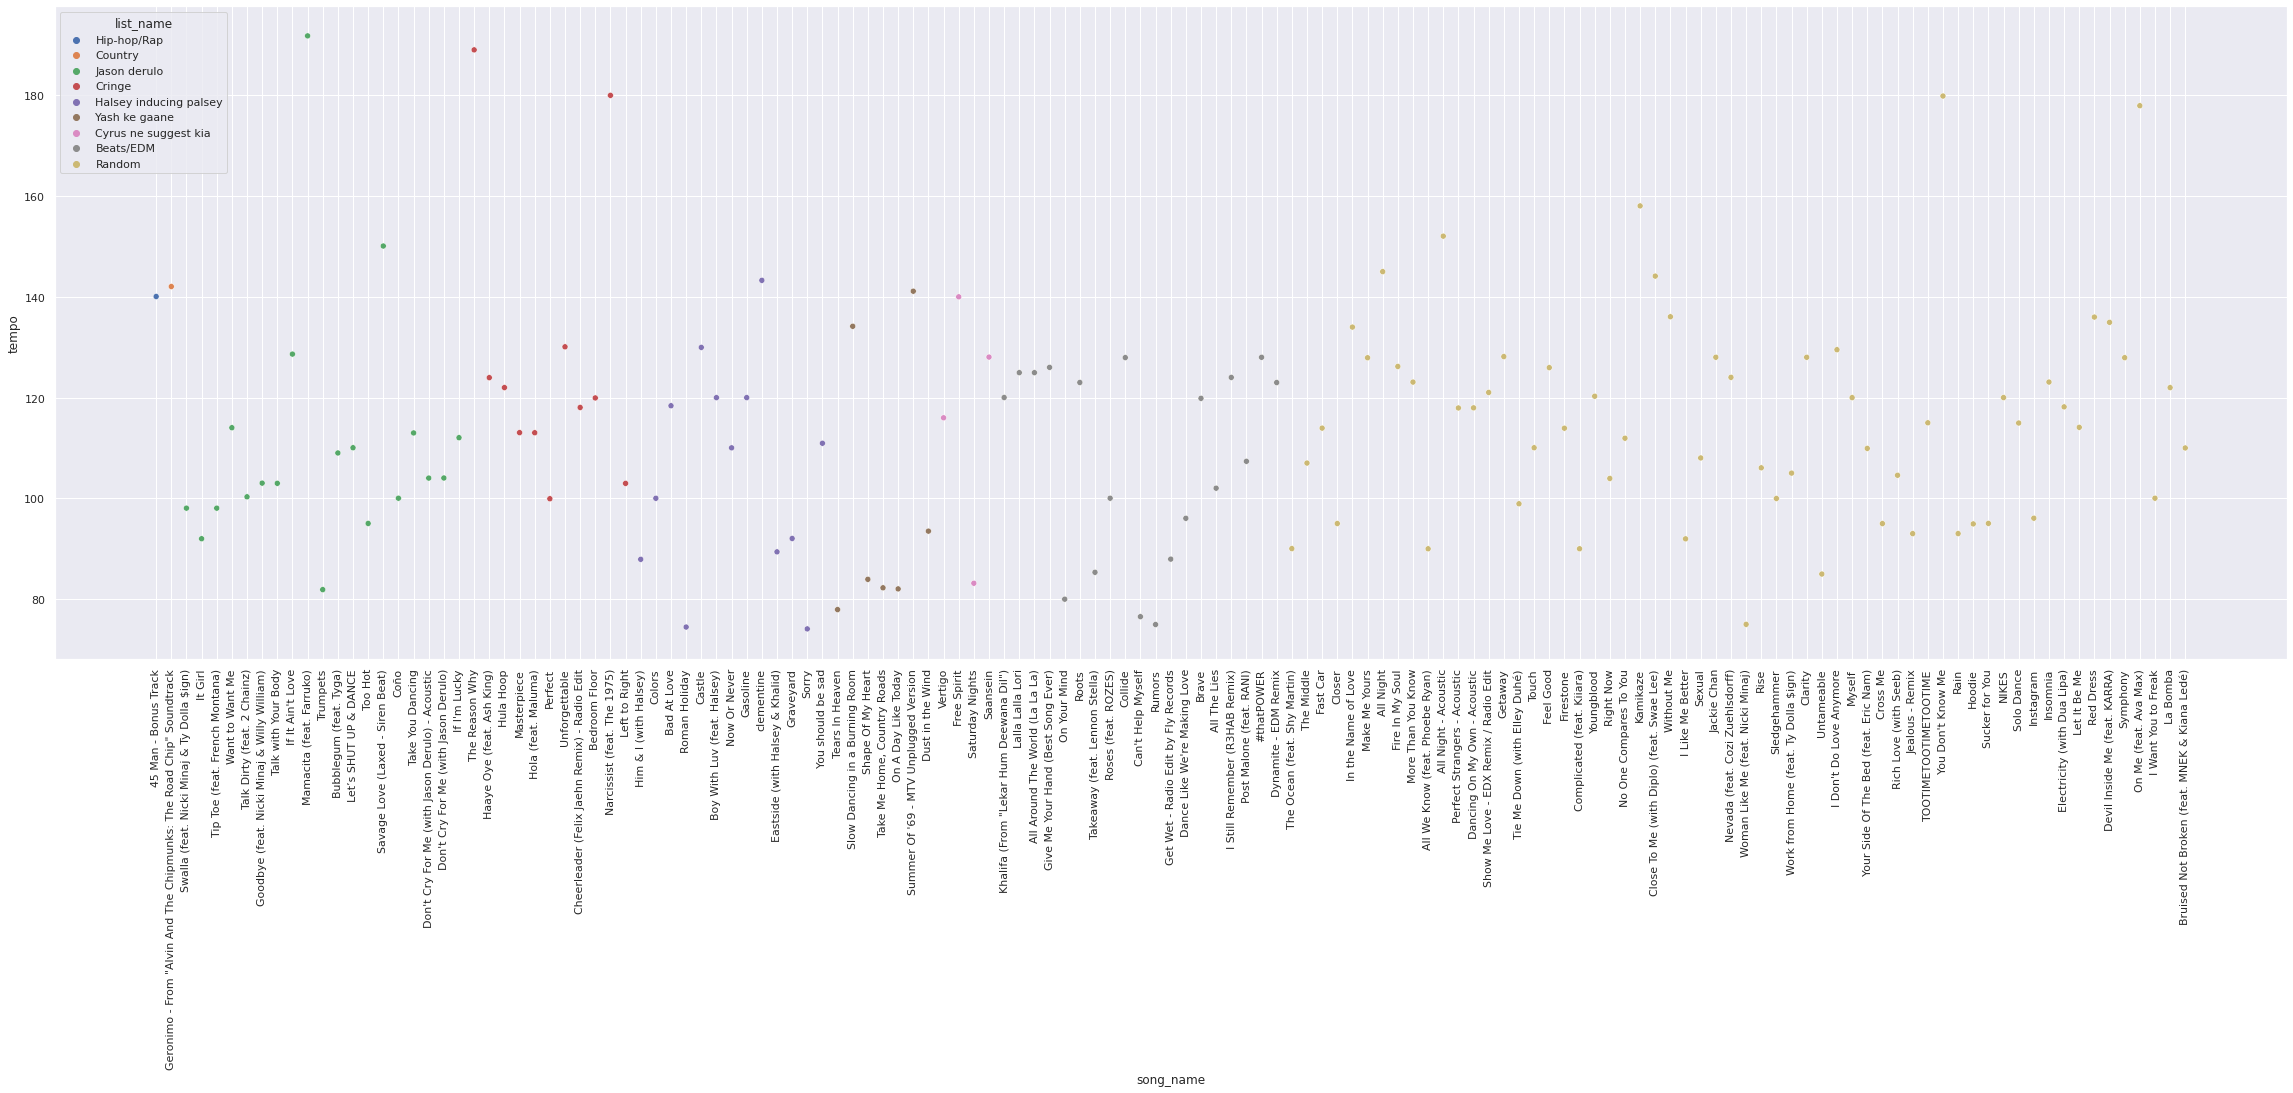

In [ ]:
plt.rcParams['figure.figsize'] = (40,12)
sns.scatterplot(data=df, x='song_name', y='tempo', hue='list_name')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].apply(lambda x: x.year)

In [ ]:
idx = pd.DataFrame(range(1971,2020),columns=['Release Year'])

# then merge the idx with df"release_year" that is just created
release_year = pd.merge(idx, df[['song_id', 'year']], how='left',left_on='Release Year',right_on = 'year', copy=False)

release_year.drop("year",inplace=True,axis=1)
release_year.head(3)

,Release Year,song_id
0,1971,1YYhDizHx7PnDhAhko6cDS
1,1972,NaN
2,1973,NaN


In [ ]:
release_year = release_year.groupby('Release Year', as_index=False)['song_id'].count()
release_year.head(3)

,Release Year,song_id
0,1971,1
1,1972,0
2,1973,0


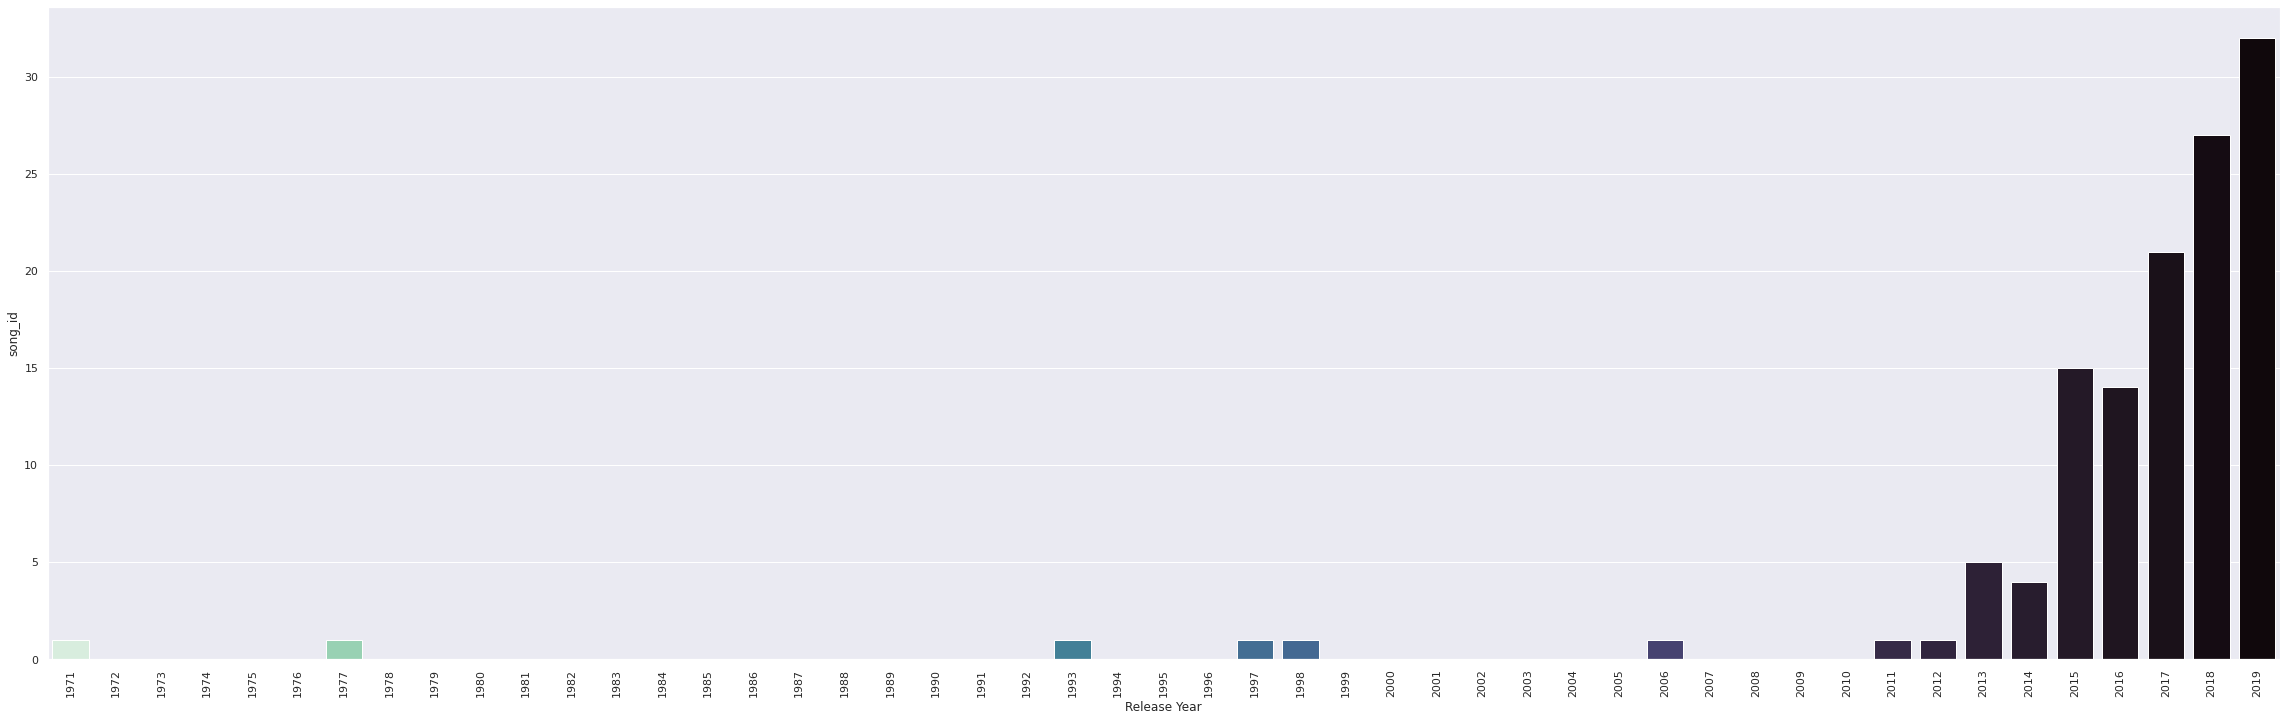

In [ ]:
sns.barplot(data=release_year, x='Release Year', y='song_id', palette='mako_r')
plt.xticks(rotation=90)
plt.show()

In [ ]:
key_mode = df.groupby(["key","mode"], as_index=False)["song_id"].count()
key_mode.head(3)

,key,mode,song_id
0,0,0,3
1,0,1,8
2,1,0,8


In [ ]:
# map the key in number to the real key represented in alphabet
key_dic = {0: "C", 
           1: "C♯/D♭",
           2: "D",
           3: "D♯/E♭",
           4: "E",
           5: "F",
           6: "F♯/G♭",
           7: "G",
           8: "G♯/A♭",
           9: "A",
           10: "A♯/B♭",
           11: "B"}
key_mode = key_mode.replace({"key": key_dic})

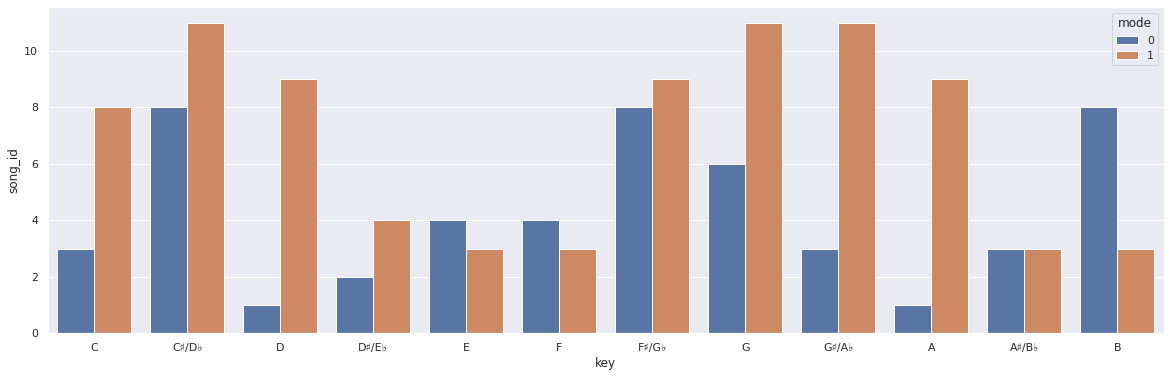

In [ ]:
sns.barplot(data=key_mode, x='key', y='song_id', hue='mode')
plt.show()

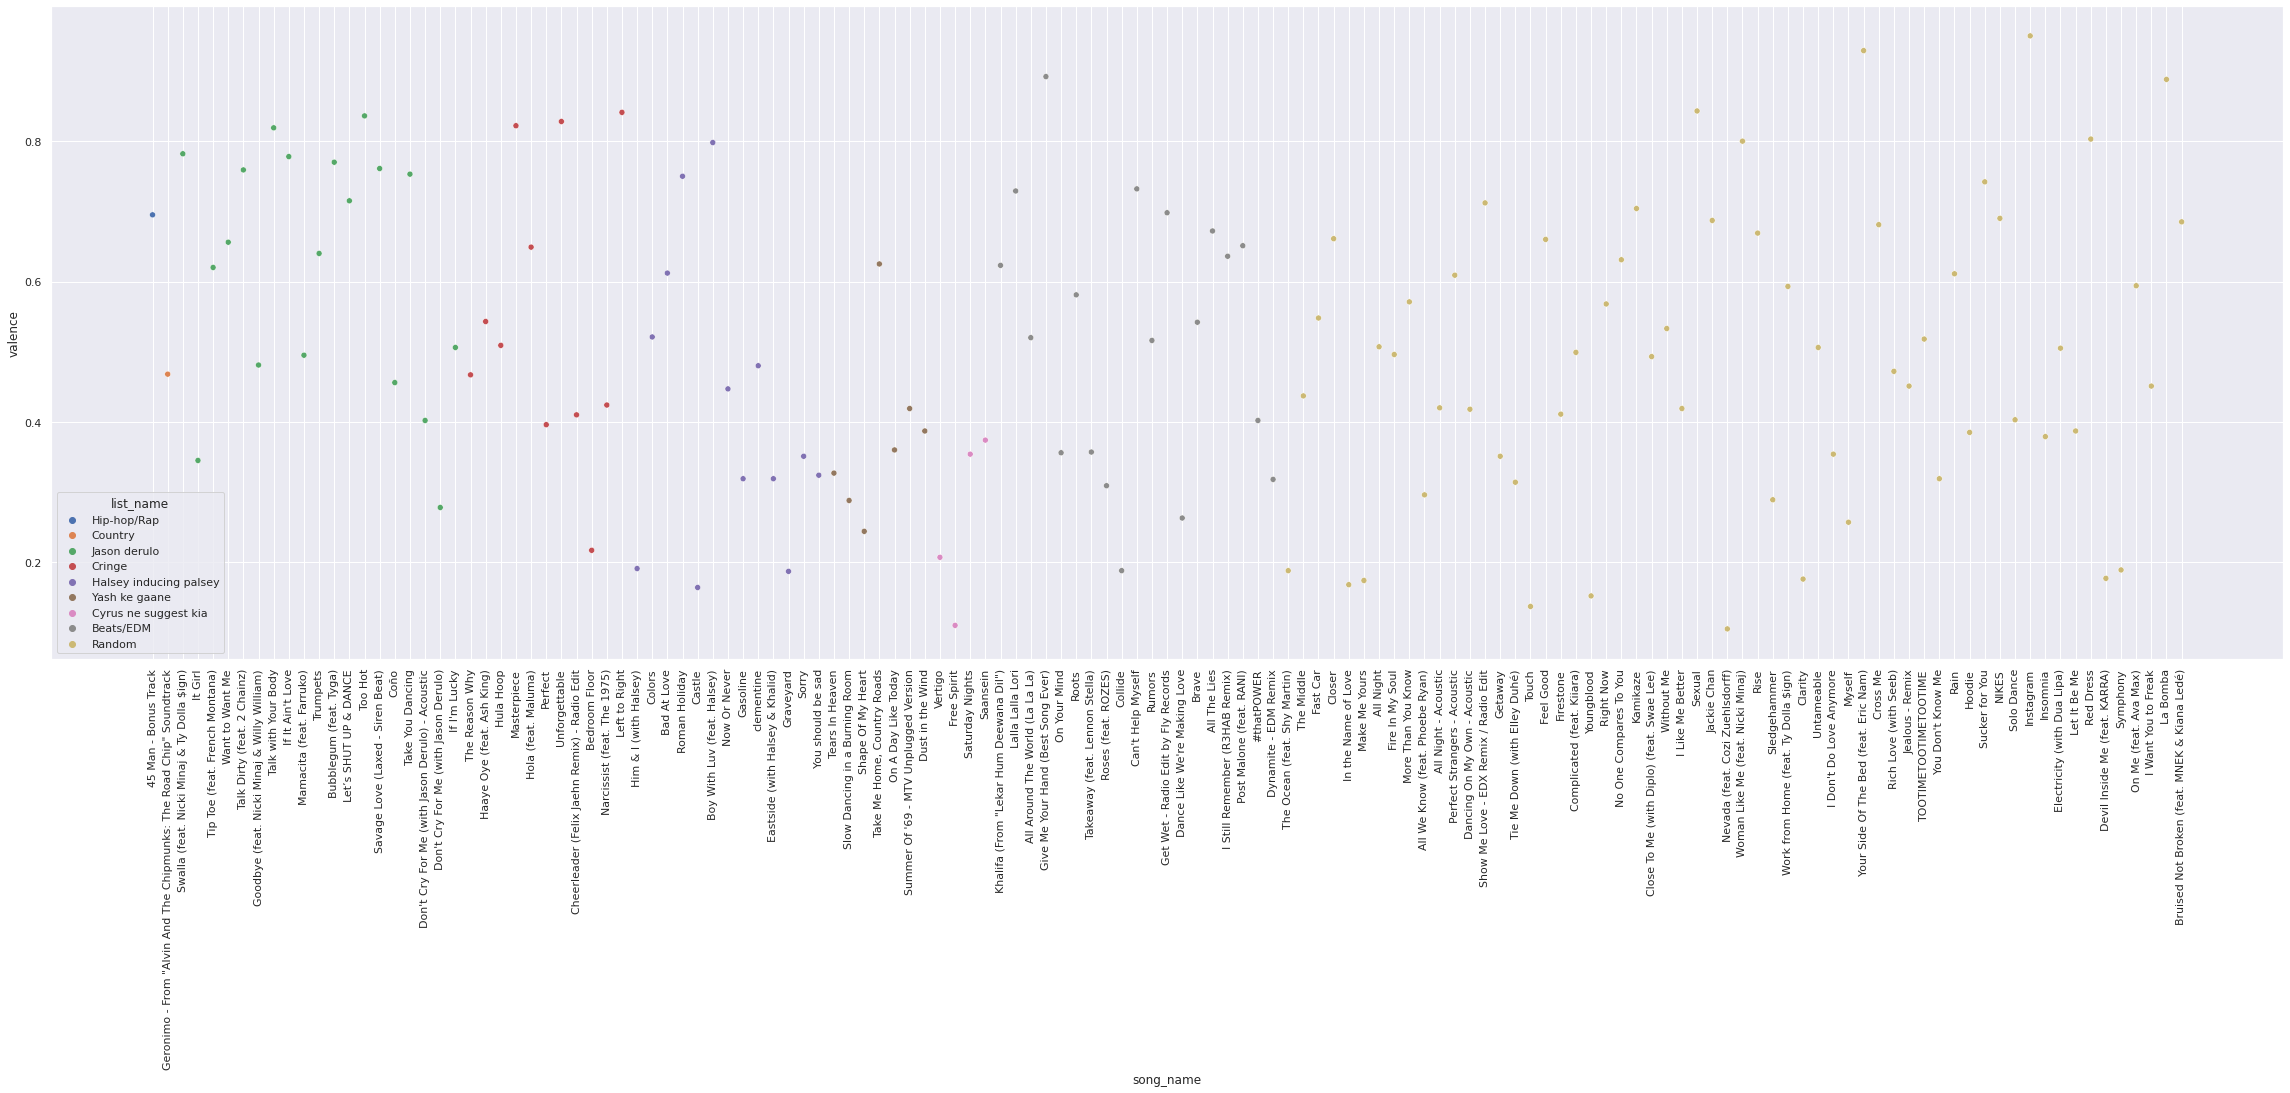

In [ ]:
plt.rcParams['figure.figsize'] = (40,12)
sns.scatterplot(data=df, x='song_name', y='valence', hue='list_name')
plt.xticks(rotation=90)
plt.show()